In [3]:
import numpy as np
import csv

In [36]:
file_path = "./storage/save_ref_rx_serial_32B1708.dat"
with open(file_path, 'r') as f:
    data = f.read();

data = data.split(",")

complex_symbols = np.empty([len(data),], dtype=complex)
for i in range(len(data)):
    tmp = data[i].split("|")
    complex_symbols[i] = float(tmp[0]) + 1j*float(tmp[1])

print(complex_symbols.shape, complex_symbols.dtype)

(2000000,) complex128


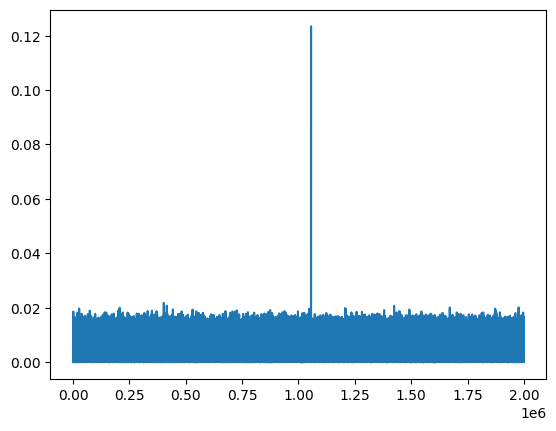

In [37]:
from matplotlib import pyplot as plt
dlen = complex_symbols.size
plot_symb = complex_symbols
plt.plot(np.arange(plot_symb.size), np.abs(plot_symb))

In [31]:
N = 139
M = 31
R = 1
zfc_seq = np.array([np.exp(-1j * np.pi * M * n * (n + 1) / N) for n in range(N)])
zfc_seq_rep = np.tile(zfc_seq, R)
print(zfc_seq.shape)
print(zfc_seq_rep.shape)

(139,)
(139,)


1288303


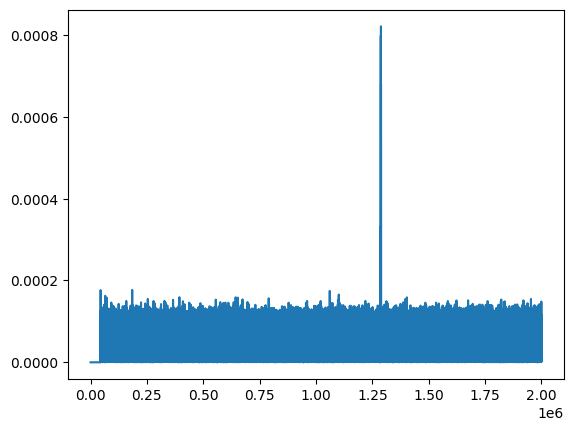

In [34]:
corr_zfc = np.correlate(complex_symbols, zfc_seq, mode='full')
plot_corr = np.abs(corr_zfc) / N #[N-1:-(N-1)]
plt.plot(plot_corr)
print(np.argmax(plot_corr))

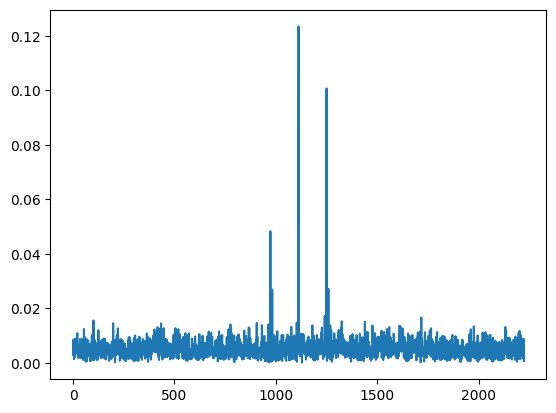

In [38]:
plot_corr = np.abs(complex_symbols)
pmax = np.argmax(plot_corr).item()
plt.plot(plot_corr[pmax-N*8 : pmax + N*8])